In [1]:
import mosum
from bottom_up import multiscale_bottomUp

In [2]:
# DATA MANIPULATION
import pandas as pd
import polars as pl
import numpy as np
import json
import finpy_tse as fpy
import jdatetime

pl.Config.set_tbl_rows(30)

# CUSTOM LIBRARIES
import matplotlib.pyplot as plt


In [3]:
stock_name = "ذوب"
price_df = fpy.Get_Price_History(
    stock=stock_name,
    start_date="1398-01-01",
    end_date=jdatetime.datetime.today().strftime("%Y-%m-%d"),
    double_date=True,
    adjust_price=True,
)
price_df


,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market,Adj Open,Adj High,Adj Low,Adj Close,Adj Final
J-Date,,,,,,,,,,,,,,,,,
1398-01-05,2019-03-25,1475,1477,1440,1447,1449,63561126,92083090865,5098,ذوب,سهامی ذوب آهن اصفهان,فرابورس,1231,1233,1202,1207,1209
1398-01-06,2019-03-26,1450,1469,1431,1464,1452,101521005,147445273897,7643,ذوب,سهامی ذوب آهن اصفهان,فرابورس,1210,1226,1194,1222,1212
1398-01-07,2019-03-27,1469,1524,1468,1524,1518,235350064,357258152248,10426,ذوب,سهامی ذوب آهن اصفهان,فرابورس,1226,1272,1225,1272,1267
1398-01-10,2019-03-30,1560,1593,1540,1593,1589,237725261,377665798861,11011,ذوب,سهامی ذوب آهن اصفهان,فرابورس,1302,1329,1285,1329,1326
1398-01-11,2019-03-31,1630,1645,1531,1572,1584,229097328,362906994000,16080,ذوب,سهامی ذوب آهن اصفهان,فرابورس,1360,1373,1278,1312,1322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402-01-16,2023-04-05,4600,4926,4550,4828,4808,188478369,906217316423,7426,ذوب,ذوب آهن اصفهان,بورس,4600,4926,4550,4828,4808
1402-01-19,2023-04-08,4828,5048,4808,4934,5023,292301326,1468114707598,9375,ذوب,ذوب آهن اصفهان,بورس,4828,5048,4808,4934,5023
1402-01-20,2023-04-09,5012,5140,4830,4894,4962,195164211,968316820558,10369,ذوب,ذوب آهن اصفهان,بورس,5012,5140,4830,4894,4962


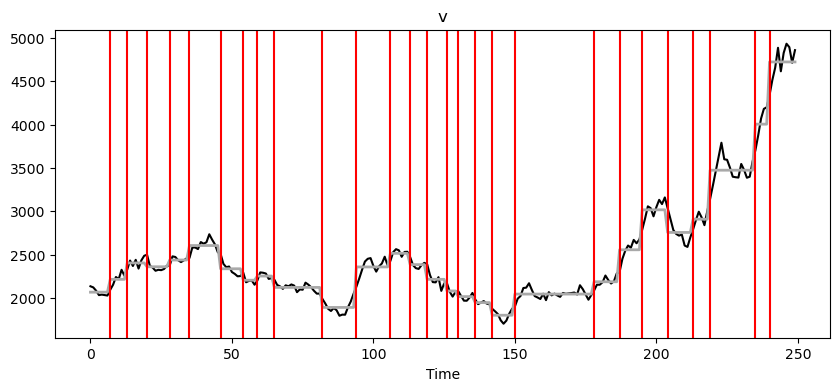

In [20]:
%%capture --no-display
data = price_df["Adj Close"].iloc[-250:].to_numpy()
ms_multi = multiscale_bottomUp(data, G = [0.02, 0.03])
ms_multi.plot()
plt.show()

In [8]:
ms_multi